<a href="https://colab.research.google.com/github/yashpokra/C02-Emissions-Prediction/blob/main/C02_Car_Emission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [35]:
!wget https://raw.githubusercontent.com/yashpokra/C02-Emissions-Prediction/main/CO2%20Emissions_Canada.csv

--2022-05-12 05:30:09--  https://raw.githubusercontent.com/yashpokra/C02-Emissions-Prediction/main/CO2%20Emissions_Canada.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476091 (465K) [text/plain]
Saving to: ‘CO2 Emissions_Canada.csv.1’

CO2 Emissions_Canad 100%[===================>] 464.93K  --.-KB/s    in 0.005s  

2022-05-12 05:30:09 (99.9 MB/s) - ‘CO2 Emissions_Canada.csv.1’ saved [476091/476091]



In [36]:
Emissions_data = pd.read_csv("/content/CO2 Emissions_Canada .csv") #read excel file 

In [37]:
Emissions_data.info() #displays info of all the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle_Class                     7385 non-null   object 
 3   Engine_Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel_Type                         7385 non-null   object 
 7   Fuel_Consumption_City (L/100 km)  7385 non-null   float64
 8   Fuel_Consumption_Hwy (L/100 km)   7385 non-null   float64
 9   Fuel_Consumption_Comb (L/100 km)  7385 non-null   float64
 10  Fuel_ Consumption_Comb (mpg)      7385 non-null   int64  
 11  CO2_Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [38]:
Emissions_data.head() #shows the first five rows of the data 

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City (L/100 km),Fuel_Consumption_Hwy (L/100 km),Fuel_Consumption_Comb (L/100 km),Fuel_ Consumption_Comb (mpg),CO2_Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [39]:
Emissions_data.tail() #shows the last rows of the data 

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City (L/100 km),Fuel_Consumption_Hwy (L/100 km),Fuel_Consumption_Comb (L/100 km),Fuel_ Consumption_Comb (mpg),CO2_Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [40]:
Emissions_data.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size(L)', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City (L/100 km)',
       'Fuel_Consumption_Hwy (L/100 km)', 'Fuel_Consumption_Comb (L/100 km)',
       'Fuel_ Consumption_Comb (mpg)', 'CO2_Emissions(g/km)'],
      dtype='object')

In [41]:
Emissions_data.iloc[:, 11]

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2_Emissions(g/km), Length: 7385, dtype: int64

Text(0, 0.5, 'C02 Consumption')

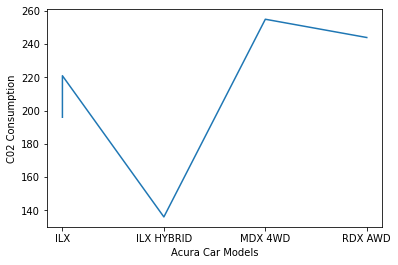

In [42]:
x = (Emissions_data.iloc[:, 1].head()) # get the model names 
y = (Emissions_data.iloc[:, 11].head()) # get the C02 values 
plt.plot(x,y)
plt.xlabel("Acura Car Models")
plt.ylabel("C02 Consumption")

In [43]:
Emissions_data.count() #counts the total amount of each value in the column 

Make                                7385
Model                               7385
Vehicle_Class                       7385
Engine_Size(L)                      7385
Cylinders                           7385
Transmission                        7385
Fuel_Type                           7385
Fuel_Consumption_City (L/100 km)    7385
Fuel_Consumption_Hwy (L/100 km)     7385
Fuel_Consumption_Comb (L/100 km)    7385
Fuel_ Consumption_Comb (mpg)        7385
CO2_Emissions(g/km)                 7385
dtype: int64

In [44]:
print(Emissions_data.Cylinders.value_counts())
#amount of cylinders for fuel

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64


In [45]:
print(Emissions_data.Transmission.value_counts())
#Transmission type with number of gears listed by it

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64


In [46]:
print(Emissions_data.Model.value_counts())
#All models of different cars 


F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: Model, Length: 2053, dtype: int64


In [47]:
print(Emissions_data.Make.value_counts())
#The company of cars 

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64


In [48]:
print(Emissions_data.Fuel_Type.value_counts())
# X represents Regular Gasoline
# Z represents Premium Gasoline
# E represents E85, which is 85% ethanol fuel and 15% gasoline or another hydrocarbon
# D represents Diesel
# N represents Natural Gasoline 

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel_Type, dtype: int64


In [49]:
Emission_fuel_change = Emissions_data.replace({'Fuel_Type':{'D':0, 'E':1, 'N':2, 'X':3, 'Z':4}}) 


In [50]:
Emission_fuel_change.tail(20) #shows the list 

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City (L/100 km),Fuel_Consumption_Hwy (L/100 km),Fuel_Consumption_Comb (L/100 km),Fuel_ Consumption_Comb (mpg),CO2_Emissions(g/km)
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,3,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,3,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,3,7.9,5.9,7.0,40,163
7368,VOLKSWAGEN,Jetta GLI,COMPACT,2.0,4,AM7,3,9.3,7.2,8.4,34,196
7369,VOLKSWAGEN,Jetta GLI,COMPACT,2.0,4,M6,3,9.6,7.1,8.5,33,198
7370,VOLKSWAGEN,Passat,MID-SIZE,2.0,4,AS6,3,10.2,6.9,8.7,32,205
7371,VOLKSWAGEN,Tiguan,SUV - SMALL,2.0,4,AS8,3,10.5,8.1,9.4,30,221
7372,VOLKSWAGEN,Tiguan 4MOTION,SUV - SMALL,2.0,4,AS8,3,11.5,8.7,10.2,28,241
7373,VOLVO,S60 T5,COMPACT,2.0,4,AS8,4,10.5,7.1,8.9,32,208
7374,VOLVO,S60 T6 AWD,COMPACT,2.0,4,AS8,4,11.0,7.4,9.4,30,219


Splitting Data for predicting CO2 Emissions

In [57]:
#dropping columns that won't be used for prediction 

Emission_updated = Emission_fuel_change.drop(Emission_fuel_change.iloc[:, [0, 1, 2, 5, 6, 9, 10, 11]], axis = 1)
print(Emission_updated)
    
X = Emission_updated #data that will help for the prediction, as their numerical 
Y = Emission_fuel_change.iloc[: , 11]


      Engine_Size(L)  Cylinders  Fuel_Consumption_City (L/100 km)  \
0                2.0          4                               9.9   
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7380             2.0          4                              10.7   
7381             2.0          4                              11.2   
7382             2.0          4                              11.7   
7383             2.0          4                              11.2   
7384             2.0          4                              12.2   

      Fuel_Consumption_Hwy (L/100 km)  
0                                 6.7  
1                                 7.7  
2                                 5.8  
3          

In [52]:
print(X), print(Y)

      Engine_Size(L)  Cylinders  Fuel_Consumption_City (L/100 km)  \
0                2.0          4                               9.9   
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7380             2.0          4                              10.7   
7381             2.0          4                              11.2   
7382             2.0          4                              11.7   
7383             2.0          4                              11.2   
7384             2.0          4                              12.2   

      Fuel_Consumption_Hwy (L/100 km)  
0                                 6.7  
1                                 7.7  
2                                 5.8  
3          

(None, None)

Splitting Training and Testing Data

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) 

In [59]:
lin_reg_model = LinearRegression()
LinearRegression().fit(X_train, Y_train) #training data to create a linear model
lin_reg_model.fit(X_test, Y_test) #seeing if the testing data is fitted to be compared 
data_prediction = lin_reg_model.predict(X_test) #values that will be utilized to test linear model

In [55]:
R2_score = metrics.r2_score(Y_test, data_prediction)
print (R2_score)  #prints score which demonstrates how close the predicted data is with the actual data, based on closeness towards 1

0.8804408820718505


Text(0.5, 1.0, ' Predicted C02 Emissions vs Real C02 Emissions')

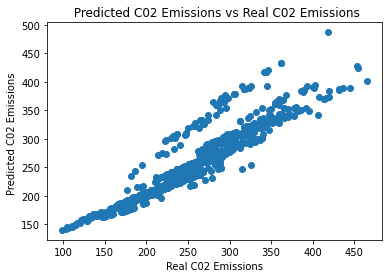

In [60]:

#Visualizing linear regression of real data vs predicted data 

plt.scatter(Y_test, data_prediction)
plt.xlabel("Real C02 Emissions")
plt.ylabel("Predicted C02 Emissions ")
plt.title(" Predicted C02 Emissions vs Real C02 Emissions")
